In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

BUS_PATH = "../Singapore_bus"
dirs = os.listdir(BUS_PATH)
Bus_FileName_DirList = dirs
Bus_FileName_DirList
Bus_FileName_DirList = sorted(Bus_FileName_DirList)

In [3]:
weekday = [15, 16, 17, 18, 19, 20, 21]

In [4]:
import pandas as pd

# 生成日期时间索引，每天只取5:30到23:30
index_16th = pd.date_range(start='2017-01-16 05:30',
                           end='2017-01-16 23:30', freq='15T')
index_16th_data = pd.DataFrame(index=index_16th, columns=['num'], data=0)

index_17th = pd.date_range(start='2017-01-17 05:30',
                           end='2017-01-17 23:30', freq='15T')
index_17th_data = pd.DataFrame(index=index_17th, columns=['num'], data=0)

index_18th = pd.date_range(start='2017-01-18 05:30',
                           end='2017-01-18 23:30', freq='15T')
index_18th_data = pd.DataFrame(index=index_18th, columns=['num'], data=0)

index_19th = pd.date_range(start='2017-01-19 05:30',
                           end='2017-01-19 23:30', freq='15T')
index_19th_data = pd.DataFrame(index=index_19th, columns=['num'], data=0)

index_20th = pd.date_range(start='2017-01-20 05:30',
                           end='2017-01-20 23:30', freq='15T')
index_20th_data = pd.DataFrame(index=index_20th, columns=['num'], data=0)

index_21th = pd.date_range(start='2017-01-21 05:30',
                           end='2017-01-21 23:30', freq='15T')
index_21th_data = pd.DataFrame(index=index_21th, columns=['num'], data=0)

index_22th = pd.date_range(start='2017-01-22 05:30',
                           end='2017-01-22 23:30', freq='15T')
index_22th_data = pd.DataFrame(index=index_22th, columns=['num'], data=0)


# 合并索引
merged_index = index_16th.union(index_17th).union(index_18th).union(
    index_19th).union(index_20th).union(index_21th).union(index_22th)
# 打印结果

index_data = [index_16th_data, index_17th_data, index_18th_data,
              index_19th_data, index_20th_data, index_21th_data, index_22th_data,]
print(merged_index)

DatetimeIndex(['2017-01-16 05:30:00', '2017-01-16 05:45:00',
               '2017-01-16 06:00:00', '2017-01-16 06:15:00',
               '2017-01-16 06:30:00', '2017-01-16 06:45:00',
               '2017-01-16 07:00:00', '2017-01-16 07:15:00',
               '2017-01-16 07:30:00', '2017-01-16 07:45:00',
               ...
               '2017-01-22 21:15:00', '2017-01-22 21:30:00',
               '2017-01-22 21:45:00', '2017-01-22 22:00:00',
               '2017-01-22 22:15:00', '2017-01-22 22:30:00',
               '2017-01-22 22:45:00', '2017-01-22 23:00:00',
               '2017-01-22 23:15:00', '2017-01-22 23:30:00'],
              dtype='datetime64[ns]', length=511, freq=None)


/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_44720/3875662354.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_16th = pd.date_range(start='2017-01-16 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_44720/3875662354.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_17th = pd.date_range(start='2017-01-17 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_44720/3875662354.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_18th = pd.date_range(start='2017-01-18 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_44720/3875662354.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_19th = pd.date_range(start='2017-01-19 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/i

In [5]:
server1 = '913'
server2 = '185'
station1 = 42109
station2 = 12101

server_1 = []
server_2 = []
station_1 = []
station_2 = []

for day, index in zip(weekday, index_data):
    # 数据加载和预处理
    data_day = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[day]))
    data = data_day.loc[:, ['Bus_Service_Number',
                            'Boarding_stop_stn', 'Ride_start_date', 'Ride_start_time']]

    # 时间过滤
    data = data[(data.Ride_start_time >= "05:30:00") &
                (data.Ride_start_time < "23:30:00")].copy()

    # 时间格式转换
    data_temp = data.assign(
        Ride_start_time=lambda x: pd.to_datetime(
            x['Ride_start_date'] + ' ' + x['Ride_start_time'])
    ).sort_values('Ride_start_time').set_index('Ride_start_time')

    # 服务线路统计
    def process_group(df, group_col, group_val, index):
        return (
            df.loc[df[group_col] == group_val]
            .assign(num=1)
            .resample('15min')['num']
            .count()
            .reindex(index.index, fill_value=0)
        )

    # 913路公交
    server_1.append(process_group(
        data_temp, 'Bus_Service_Number', '913', index).tolist())

    # 185路公交
    server_2.append(process_group(
        data_temp, 'Bus_Service_Number', '185', index).tolist())

    # 站点统计
    station_1.append(process_group(
        data_temp, 'Boarding_stop_stn', 43131, index).tolist())
    station_2.append(process_group(
        data_temp, 'Boarding_stop_stn', 17179, index).tolist())

    print(f'Processed {day}')

Processed 15
Processed 16
Processed 17
Processed 18
Processed 19


/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_44720/475013311.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_day = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[day]))


Processed 20
Processed 21


In [6]:
time_index = pd.timedelta_range(start='5:30:00', end='23:30:00', freq='15T')

/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_44720/399581520.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.timedelta_range(start='5:30:00', end='23:30:00', freq='15T')


In [7]:
time_index

TimedeltaIndex(['0 days 05:30:00', '0 days 05:45:00', '0 days 06:00:00',
                '0 days 06:15:00', '0 days 06:30:00', '0 days 06:45:00',
                '0 days 07:00:00', '0 days 07:15:00', '0 days 07:30:00',
                '0 days 07:45:00', '0 days 08:00:00', '0 days 08:15:00',
                '0 days 08:30:00', '0 days 08:45:00', '0 days 09:00:00',
                '0 days 09:15:00', '0 days 09:30:00', '0 days 09:45:00',
                '0 days 10:00:00', '0 days 10:15:00', '0 days 10:30:00',
                '0 days 10:45:00', '0 days 11:00:00', '0 days 11:15:00',
                '0 days 11:30:00', '0 days 11:45:00', '0 days 12:00:00',
                '0 days 12:15:00', '0 days 12:30:00', '0 days 12:45:00',
                '0 days 13:00:00', '0 days 13:15:00', '0 days 13:30:00',
                '0 days 13:45:00', '0 days 14:00:00', '0 days 14:15:00',
                '0 days 14:30:00', '0 days 14:45:00', '0 days 15:00:00',
                '0 days 15:15:00', '0 days 15:30:00

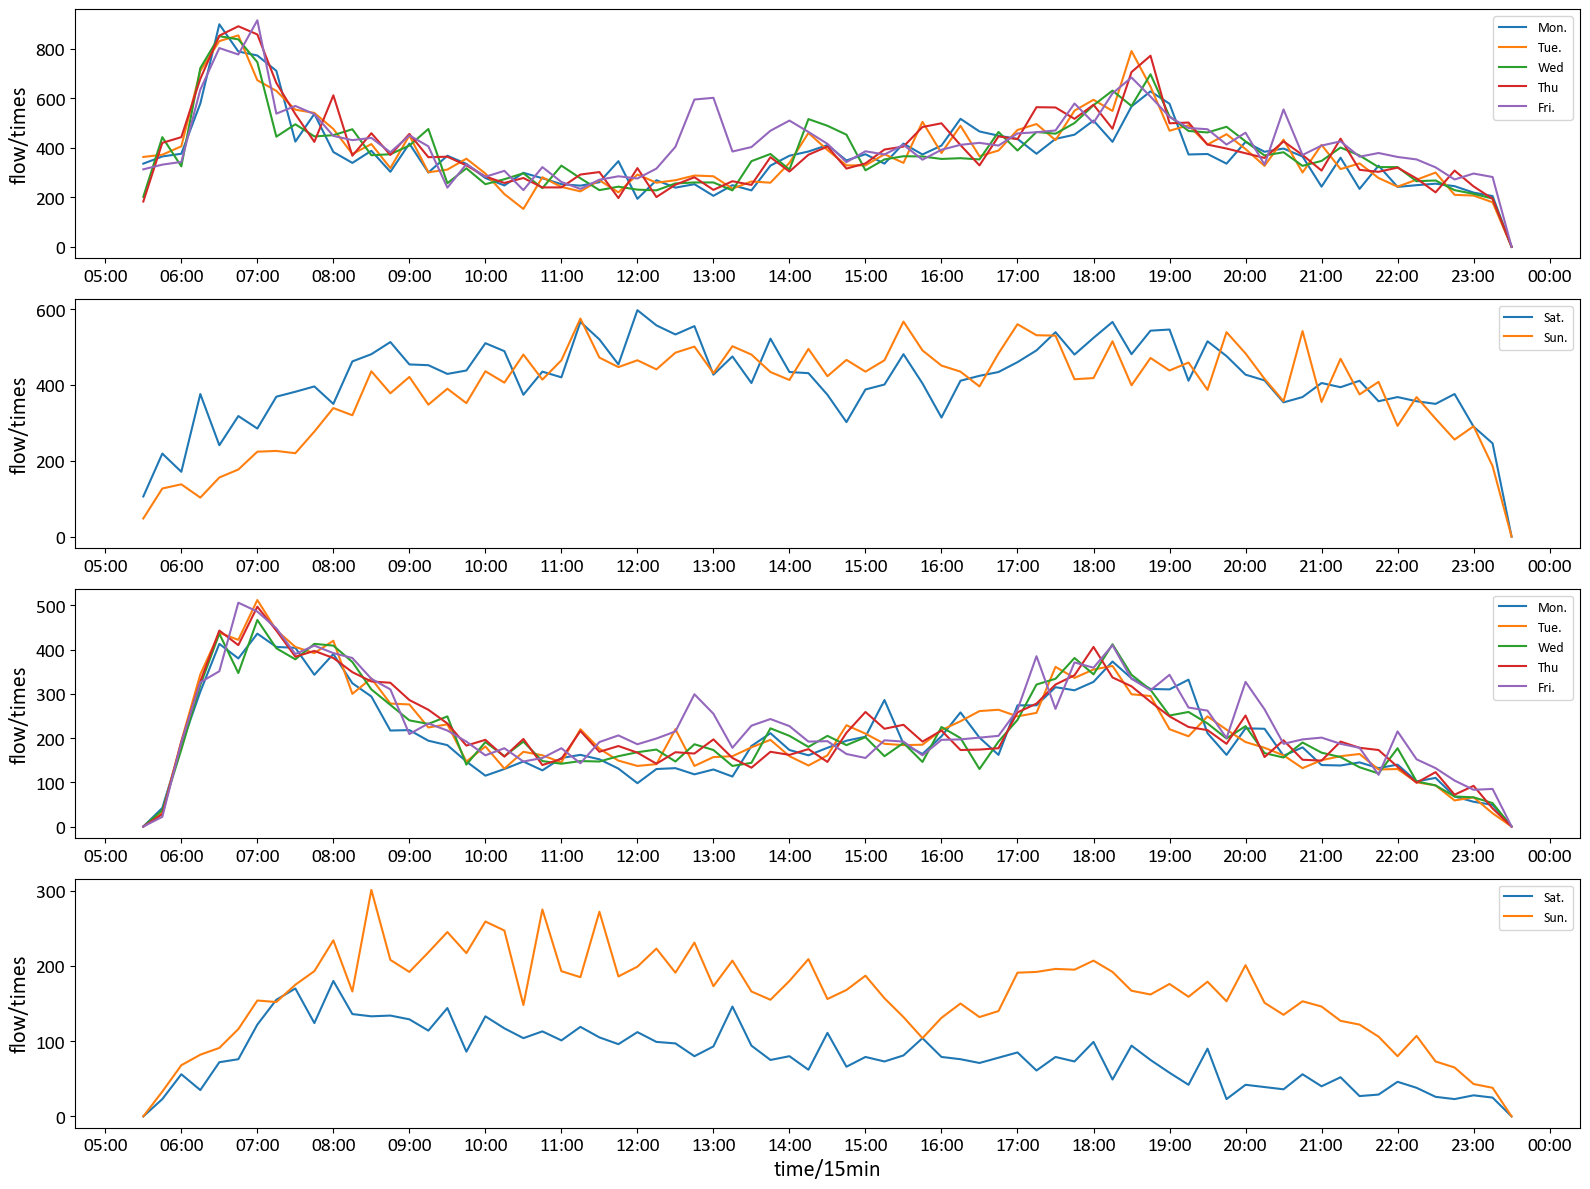

In [9]:
import matplotlib.dates as mdates
fig = plt.figure(figsize=(16, 12))

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['xtick.labelsize'] = 14          # X轴刻度字体大小
plt.rcParams['ytick.labelsize'] = 14

weekday_name = ['Mon.', 'Tue.', 'Wed', 'Thu', 'Fri.', 'Sat.', 'Sun.']
# time_index = pd.timedelta_range(start='5:30:00', end='23:30:00', freq='15T')
df = pd.DataFrame(index=time_index)
plt.subplot(4, 1, 1)
for name, y in zip(weekday_name[:5], server_1[:5]):
    plt.plot(index_16th, y, linestyle='-', label=name)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('flow/times', fontsize=16)

plt.subplot(4, 1, 2)
for name, y in zip(weekday_name[-2:], server_1[-2:]):
    plt.plot(index_16th, y, linestyle='-', label=name)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('flow/times', fontsize=16)

plt.subplot(4, 1, 3)
for name, y in zip(weekday_name[:5], server_2[:5]):
    plt.plot(index_16th, y, linestyle='-', label=name)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('flow/times', fontsize=16)

plt.subplot(4, 1, 4)
for name, y in zip(weekday_name[-2:], server_2[-2:]):
    plt.plot(index_16th, y, linestyle='-', label=name)
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xlabel('time/15min', fontsize=16)
plt.ylabel('flow/times', fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig('./线路15min每天客流统计图_new.svg', bbox_inches='tight')